# Sampling Basics 

In [4]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 16, 9
from matplotlib import rcParams
rcParams["font.serif"] = "cmr14"
rcParams['savefig.dpi'] = 300
rcParams["figure.dpi"] = 100
rcParams.update({'font.size': 18})
rcParams['axes.grid'] = True
rcParams['lines.linewidth'] = 2.0

def caption(txt):
    fig.text(.5, -.05, txt, ha='center')

## We measure a signal every second and get this plot
* What would you predict the signal to be?

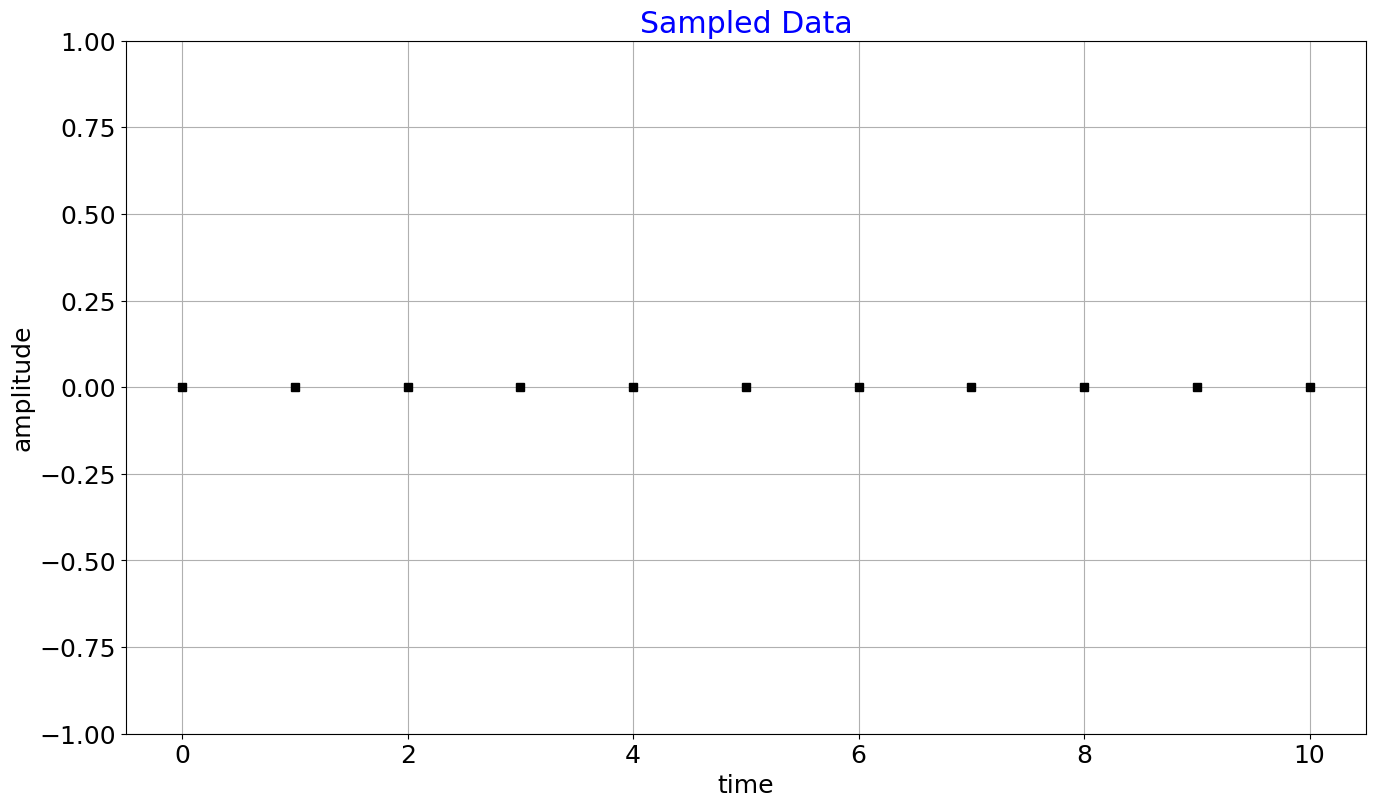

In [5]:
Ts = np.arange(11)
Data = 0*Ts

fig,ax = plt.subplots()
ax.plot(Ts,Data,'ks')
ax.set_ylim(-1,1)
ax.set_xlabel('time',fontsize=18)
ax.set_ylabel('amplitude',fontsize=18)
plt.title('Sampled Data')
plt.show()
fig.savefig('./data/Sampling_001.png', bbox_inches='tight', dpi=300)

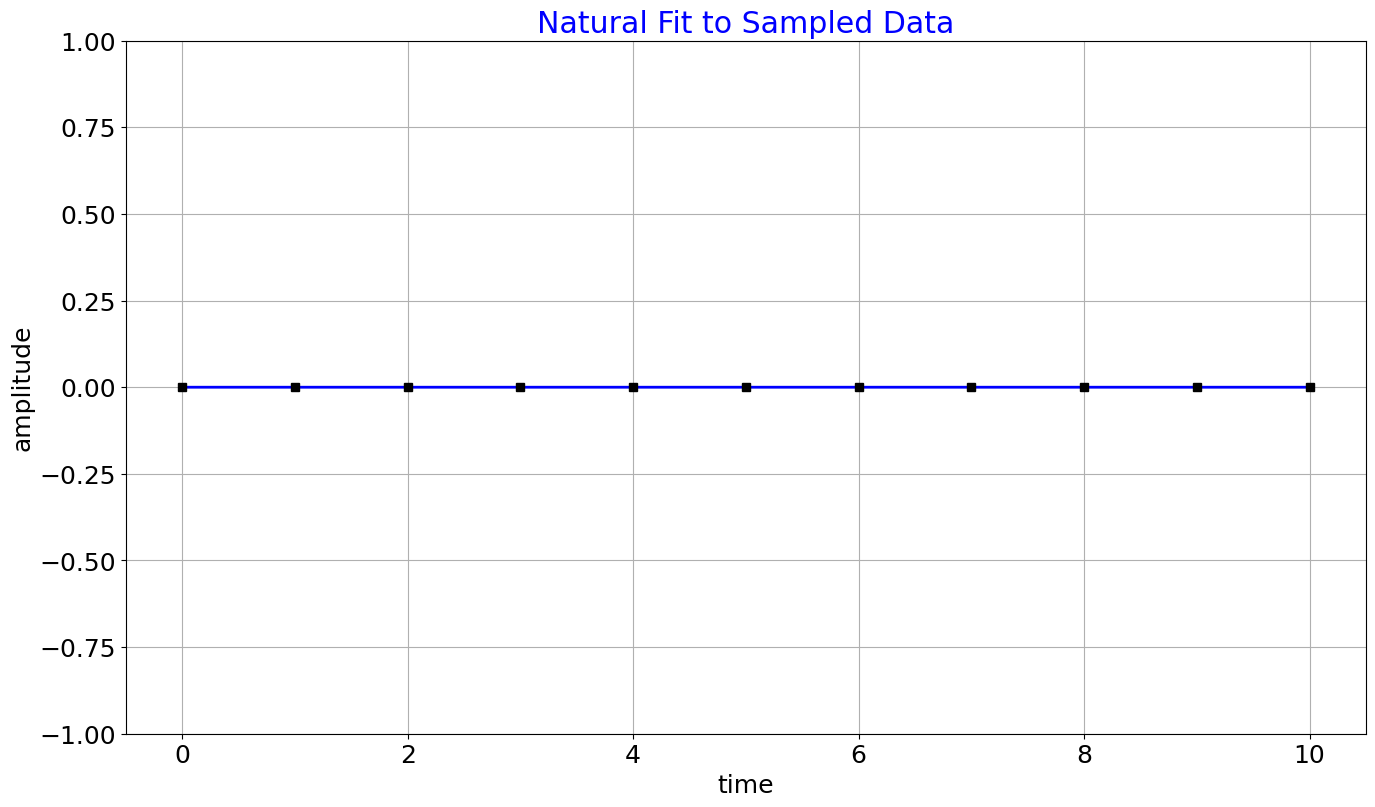

In [6]:
f = 0.5  # Hz, signal frequency
t = np.arange(0,10,1/1000) # sample interval, symmetric for convenience later
y = np.sin(2*np.pi*f*t)

fig,ax = plt.subplots()
ax.plot(t,0*y,'b-')
ax.plot(Ts,Data,'ks')
ax.set_ylim(-1,1)
ax.set_xlabel('time',fontsize=18)
ax.set_ylabel('amplitude',fontsize=18)
plt.title('Natural Fit to Sampled Data')
plt.show()
fig.savefig('./data/Sampling_002.png', bbox_inches='tight', dpi=300)

## Constant signal $y=0$ is a natural choice, but other options exist

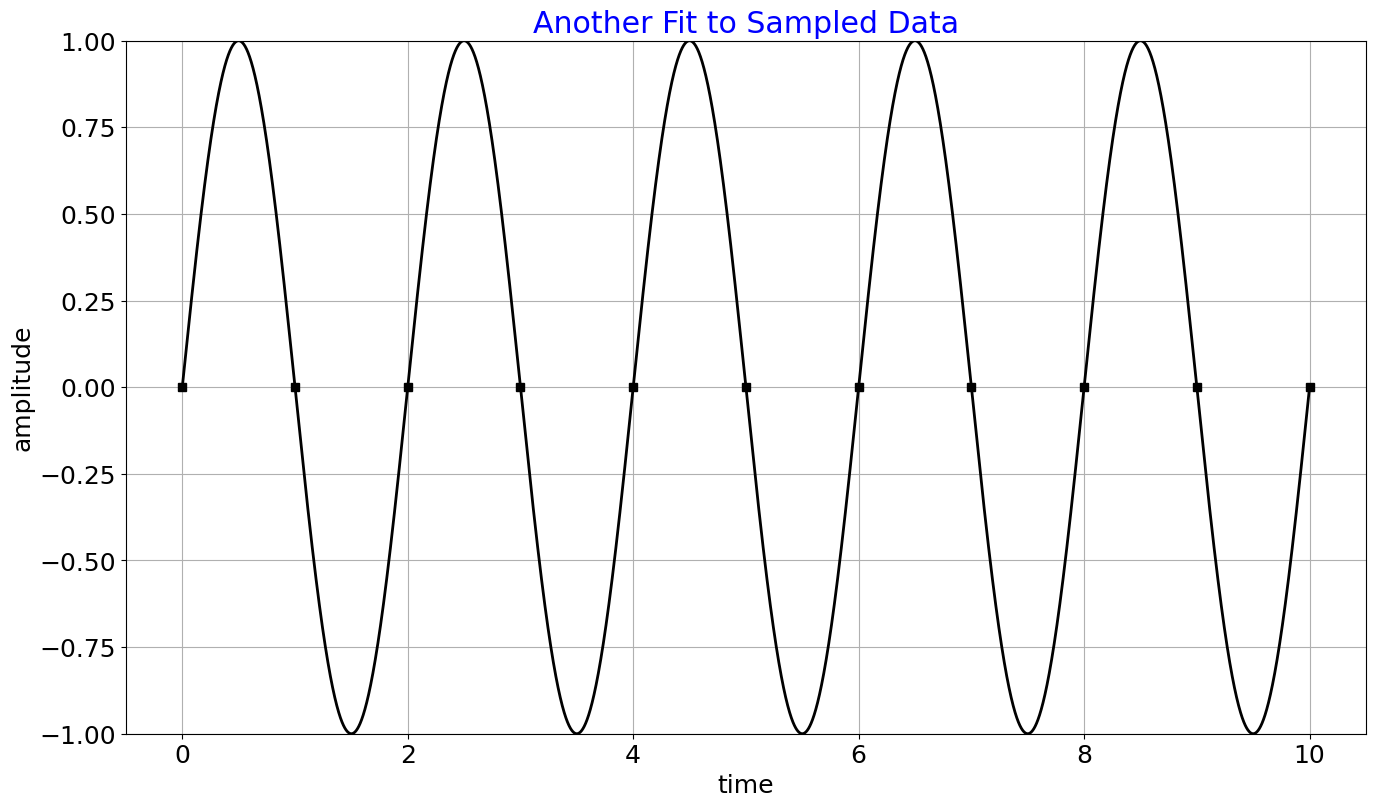

In [7]:
fig,ax = plt.subplots()
ax.plot(t,y,'k-')
ax.plot(Ts,Data,'ks')
ax.set_ylim(-1,1)
ax.set_xlabel('time',fontsize=18)
ax.set_ylabel('amplitude',fontsize=18)
plt.title('Another Fit to Sampled Data')
plt.show()
fig.savefig('./data/Sampling_002a.png', bbox_inches='tight', dpi=300)

## Actually many options...

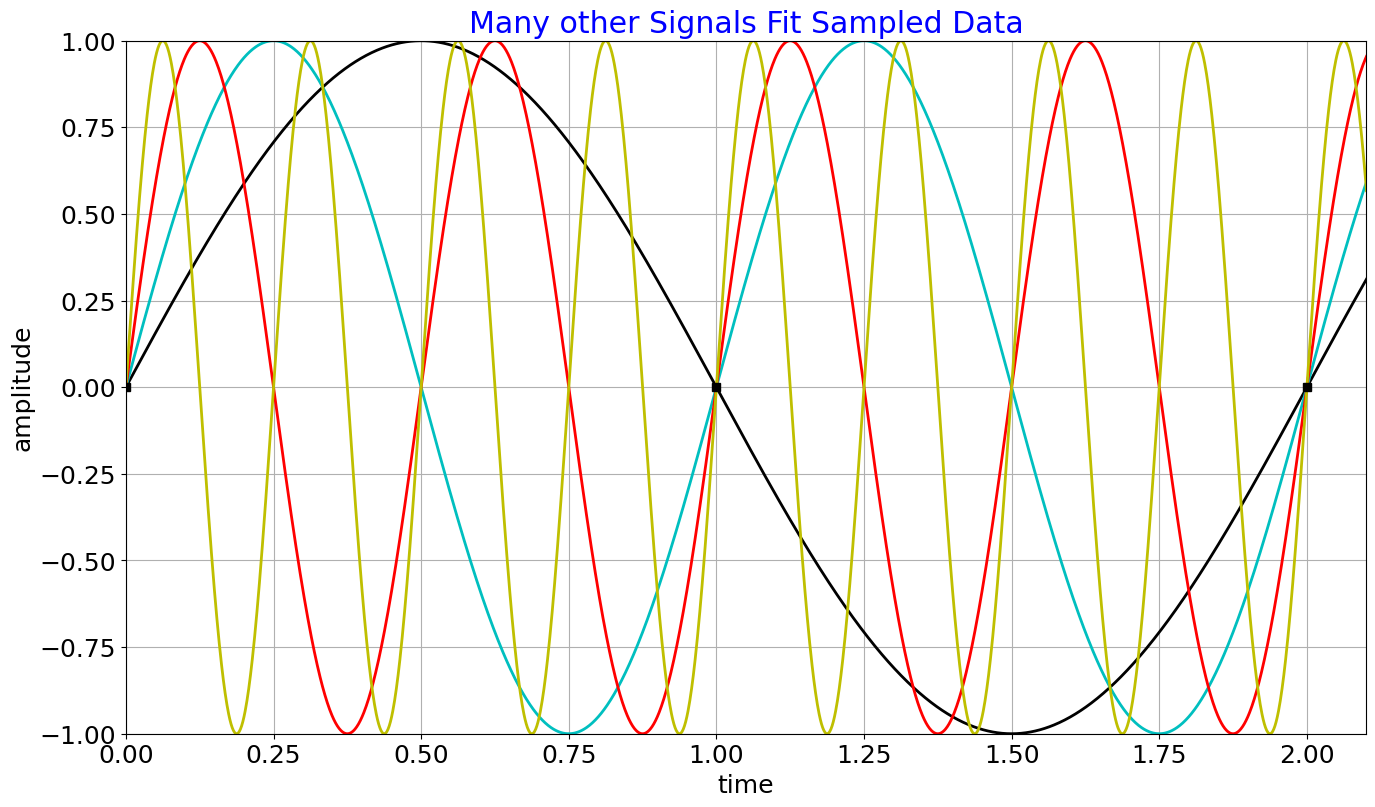

In [8]:
y2 = np.sin(2*np.pi*2*f*t)
y4 = np.sin(2*np.pi*4*f*t)
y8 = np.sin(2*np.pi*8*f*t)

fig,ax = plt.subplots()
ax.plot(t,y,'k-')
ax.plot(t,y2,'c-')
ax.plot(t,y4,'r-')
ax.plot(t,y8,'y-')
ax.plot(Ts,Data,'ks')
ax.set_ylim(-1,1)
ax.set_xlim(0,2.1)
ax.set_xlabel('time',fontsize=18)
ax.set_ylabel('amplitude',fontsize=18)
plt.title('Many other Signals Fit Sampled Data')
plt.show()
fig.savefig('./data/Sampling_003.png', bbox_inches='tight', dpi=300)

## Look at various aliasing possbilities

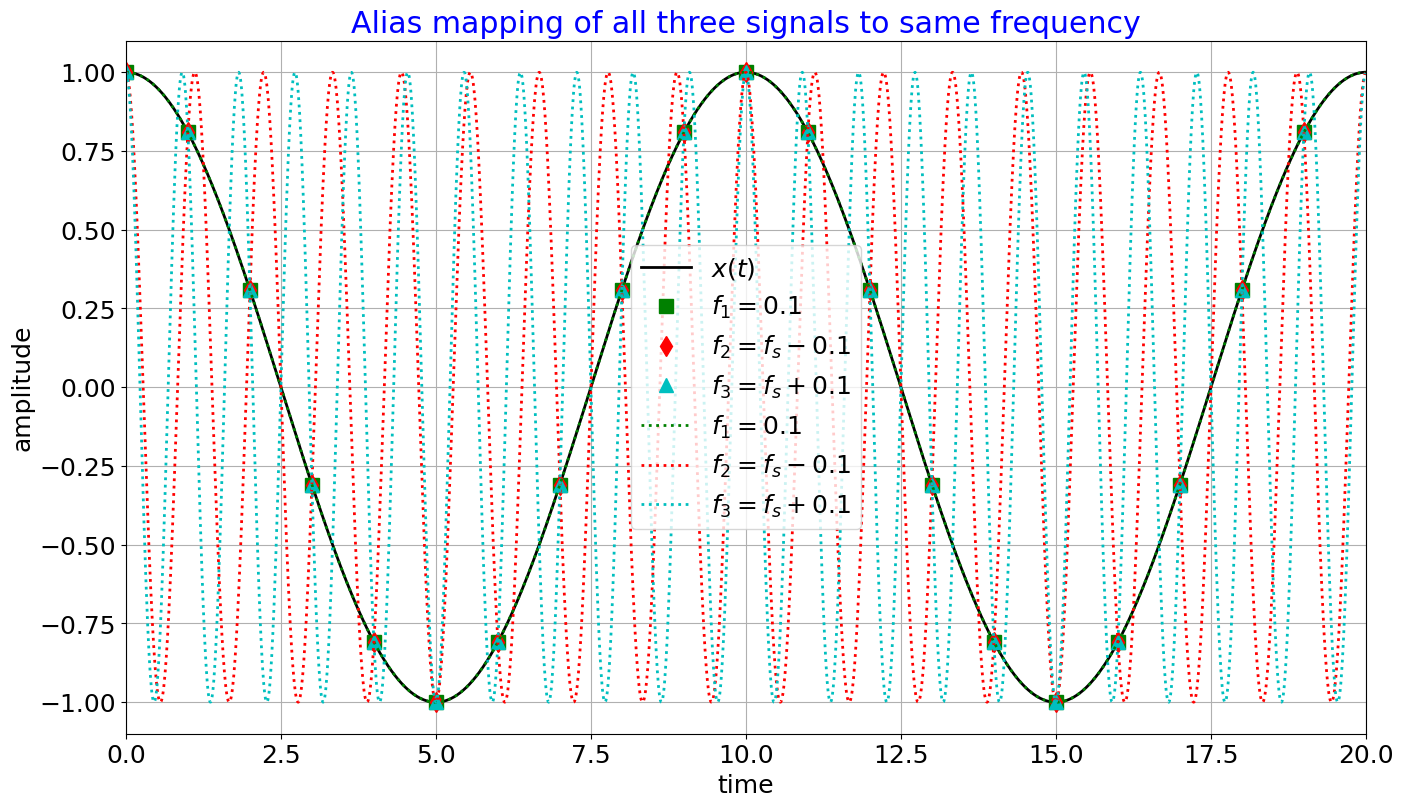

In [9]:
fs = 1
f1 = 0.1
f2 = fs - 0.1
f3 = fs + 0.1

Tf = 20/fs
t = np.arange(0,Tf,0.01)
ts = np.arange(0,Tf,1/fs)

y = np.cos(2*np.pi*f1*t)
x1 = np.cos(2*np.pi*f1*t)
x2 = np.cos(2*np.pi*f2*t)
x3 = np.cos(2*np.pi*f3*t)
y1 = np.cos(2*np.pi*f1*ts)
y2 = np.cos(2*np.pi*f2*ts)
y3 = np.cos(2*np.pi*f3*ts)

fig,ax = plt.subplots()
ax.plot(t,y,'k-',label='$x(t)$')
ax.plot(ts,y1,'gs',label='$f_1=0.1$',markersize=10)
ax.plot(ts,y2,'rd',label='$f_2=f_s-0.1$',markersize=10)
ax.plot(ts,y3,'c^',label='$f_3=f_s+0.1$',markersize=10)
ax.plot(t,x1,'g:',label='$f_1=0.1$')
ax.plot(t,x2,'r:',label='$f_2=f_s-0.1$')
ax.plot(t,x3,'c:',label='$f_3=f_s+0.1$')
ax.set_ylim(-1.1,1.1)
ax.set_xlim(0,Tf)
ax.set_xlabel('time',fontsize=18)
ax.set_ylabel('amplitude',fontsize=18)
plt.title('Alias mapping of all three signals to same frequency')
plt.legend()
plt.show()
fig.savefig('./data/Sampling_004.png', bbox_inches='tight', dpi=300)

In [10]:
fh1 = f1 - fs*round(f1/fs,0)
fh2 = f2 - fs*round(f2/fs,0)
fh3 = f3 - fs*round(f3/fs,0)
print(f'f1_hat = {fh1:.2f}')
print(f'f2_hat = {fh2:.2f}')
print(f'f3_hat = {fh3:.2f}')

f1_hat = 0.10
f2_hat = -0.10
f3_hat = 0.10


## Repeat with sine

## Note phase difference associated with the negative aliased frequency for f2

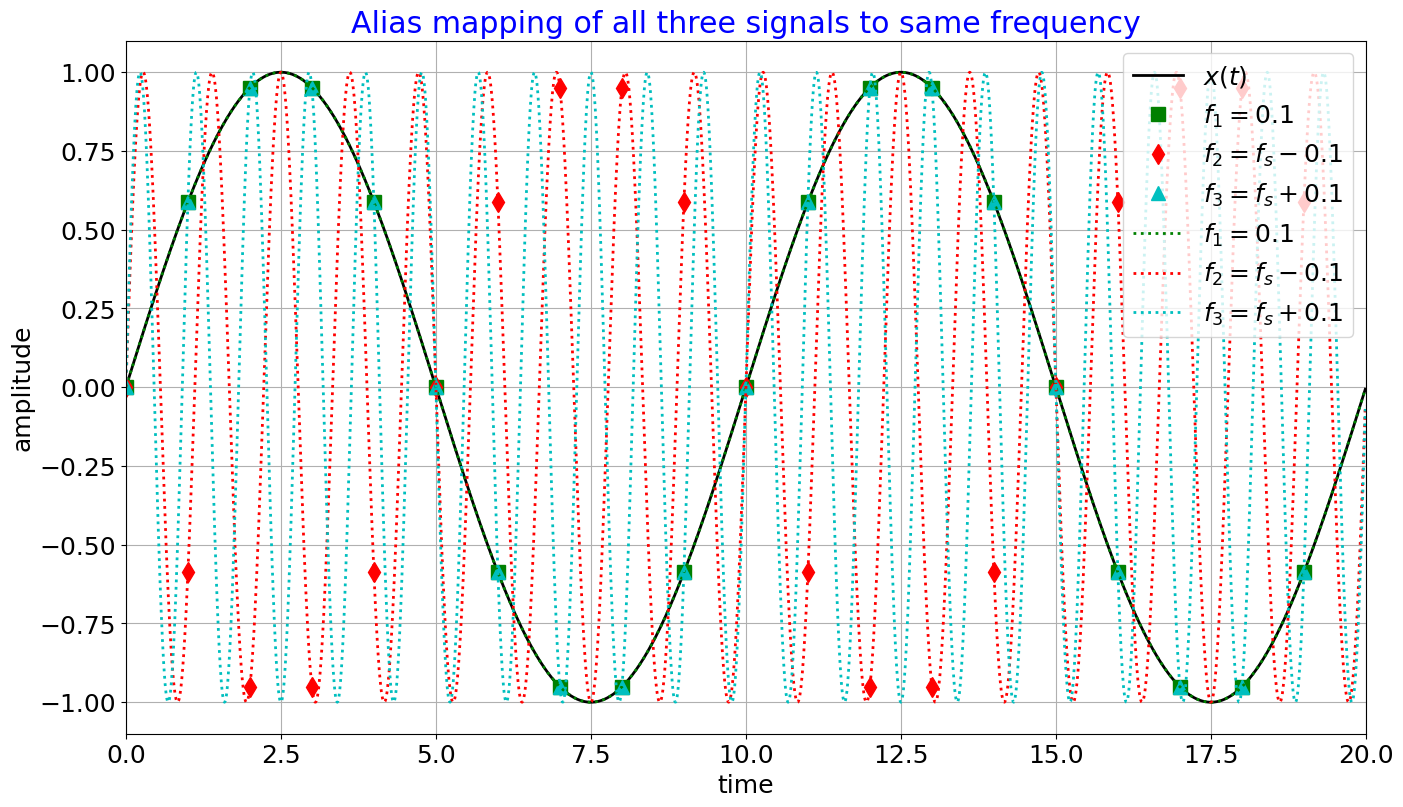

In [11]:
fs = 1
f1 = 0.1
f2 = fs - 0.1
f3 = fs + 0.1

Tf = 20/fs
t = np.arange(0,Tf,0.01)
ts = np.arange(0,Tf,1/fs)

y = np.sin(2*np.pi*f1*t)
x1 = np.sin(2*np.pi*f1*t)
x2 = np.sin(2*np.pi*f2*t)
x3 = np.sin(2*np.pi*f3*t)
y1 = np.sin(2*np.pi*f1*ts)
y2 = np.sin(2*np.pi*f2*ts)
y3 = np.sin(2*np.pi*f3*ts)

fig,ax = plt.subplots()
ax.plot(t,y,'k-',label='$x(t)$')
ax.plot(ts,y1,'gs',label='$f_1=0.1$',markersize=10)
ax.plot(ts,y2,'rd',label='$f_2=f_s-0.1$',markersize=10)
ax.plot(ts,y3,'c^',label='$f_3=f_s+0.1$',markersize=10)
ax.plot(t,x1,'g:',label='$f_1=0.1$')
ax.plot(t,x2,'r:',label='$f_2=f_s-0.1$')
ax.plot(t,x3,'c:',label='$f_3=f_s+0.1$')
ax.set_ylim(-1.1,1.1)
ax.set_xlim(0,Tf)
ax.set_xlabel('time',fontsize=18)
ax.set_ylabel('amplitude',fontsize=18)
plt.title('Alias mapping of all three signals to same frequency')
plt.legend()
plt.show()
fig.savefig('./data/Sampling_004a.png', bbox_inches='tight', dpi=300)